### Custom neural network to classify the mnist digits

In [1]:
import utility
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

In [2]:
# Fetch training data
master_train_labels, master_train_images = utility.read_mnist()
master_test_labels, master_test_images = utility.read_mnist('testing')

In [3]:
# Study the shapes
print(master_train_labels.shape)
print(master_train_images.shape)
print(master_test_labels.shape)
print(master_test_images.shape)

(60000,)
(60000, 28, 28)
(10000,)
(10000, 28, 28)


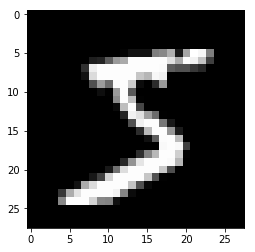

In [4]:
# Let's look at one image
plt.imshow(master_train_images[0], cmap=cm.gray)
plt.show()

In [5]:
# What are the image dimensions
print(master_train_images[0].shape)

(28, 28)


In [12]:
# Let's do some transformations to the master data

# Flatten the images from 28x28 to 784
master_train_images = master_train_images.reshape(master_train_images.shape[0], -1)
master_test_images = master_test_images.reshape(master_test_images.shape[0], -1)

print(master_train_images.shape)
print(master_test_images.shape)

(60000, 784)
(10000, 784)


In [8]:
# Let's split the training images into training and validation sets
training_pct = 0.8 # and 20% validation
training_len = master_train_images.shape[0]

train_mask = np.random.rand(training_len) < training_pct

train_images = master_train_images[train_mask]
train_labels = master_train_labels[train_mask]

valid_images = master_train_images[~train_mask]
valid_labels = master_train_labels[~train_mask]

In [9]:
print(train_images.shape)
print(valid_images.shape)

(48039, 28, 28)
(11961, 28, 28)


In [154]:
class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, ) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a
    
    @staticmethod
    def sigmoid(z):
        return 1.0/(1.0+np.exp(-z))


In [155]:
n = Network([2, 3, 1])

In [157]:
n.feedforward([1, 12])

array([ 0.3687181])